In [5]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
assets = ["TCS.BO","^BSESN"]
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = yf.download(a,start = "2014-01-01")["Adj Close"]

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [8]:
pf_data

,TCS.BO,^BSESN
Date,,
2014-01-01,858.149475,21140.480469
2014-01-02,861.576294,20888.330078
2014-01-03,885.364075,20851.330078
2014-01-06,892.376953,20787.300781
2014-01-07,879.865356,20693.240234
...,...,...
2024-02-02,3966.350098,72085.632812
2024-02-05,3972.750000,71731.421875
2024-02-06,4133.450195,72186.093750


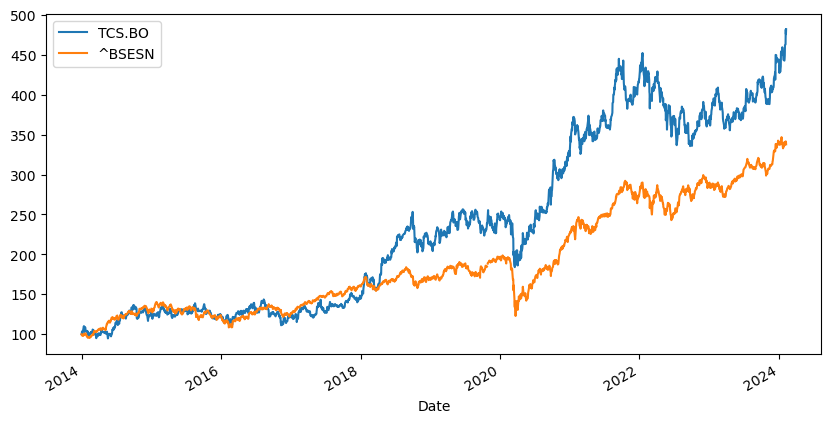

In [9]:
(pf_data/pf_data.iloc[0] * 100).plot(figsize = (10,5))
plt.show()

In [10]:
log_returns = np.log(pf_data/pf_data.shift(1))
log_returns

,TCS.BO,^BSESN
Date,,
2014-01-01,NaN,NaN
2014-01-02,0.003985,-0.011999
2014-01-03,0.027235,-0.001773
2014-01-06,0.007890,-0.003075
2014-01-07,-0.014120,-0.004535
...,...,...
2024-02-02,0.029397,0.006127
2024-02-05,0.001612,-0.004926
2024-02-06,0.039654,0.006319


In [11]:
log_returns.mean() * 250

TCS.BO    0.159234
^BSESN    0.119763
dtype: float64

In [12]:
log_returns.cov() * 250

,TCS.BO,^BSESN
TCS.BO,0.057324,0.018396
^BSESN,0.018396,0.027790


In [13]:
log_returns.corr()

,TCS.BO,^BSESN
TCS.BO,1.000000,0.460044
^BSESN,0.460044,1.000000


In [14]:
num_assets = len(assets)
num_assets

2

In [15]:
# Generating 2 random weights
arr = np.random.random(2)
arr

array([0.29440318, 0.98594084])

In [16]:
arr[0] + arr[1]

1.2803440204398238

In [17]:
# w1/(w1 + w2) + w2/(w1 + w2)
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.23183355, 0.76816645])

In [18]:
weights[0] + weights [1]

1.0

# EXPECTED PORTFOLIO RETURN

In [22]:
np.sum (weights * log_returns.mean()) * 250

0.1289135762192587

# EXPECTED PORTFOLIO VARIANCE

In [24]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.026031435576414002

# EXPECTED PORTFOLIO VOLATILITY

In [27]:
np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights)))

0.16134260310412127

# We are creating 1000 different combinations of assets weights and not 1000 different assets

In [34]:
# Append will generate new portfolio value to the existing one and this will be carried out for 1000 options.
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append (np.sum (weights * log_returns.mean()) * 250)
    pfolio_volatilities.append (np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))))

pfolio_returns,pfolio_volatilities

([0.12900667980066047,
  0.13892106962923811,
  0.1317242769992977,
  0.133268430985917,
  0.13125113049702958,
  0.15039753716129448,
  0.12116238356072354,
  0.1240540066544165,
  0.12449973309722304,
  0.13588387510315494,
  0.1442789429940198,
  0.12327640309950084,
  0.15704816724701492,
  0.12332442961644624,
  0.1558540465859003,
  0.15609921210083785,
  0.14565801179522267,
  0.1311058095776632,
  0.1251143968647755,
  0.1484461953520123,
  0.137354566546402,
  0.14622483618837628,
  0.1247995404336131,
  0.12281529687449677,
  0.1433945116324724,
  0.1432123178772258,
  0.15126963107218264,
  0.12354693510783016,
  0.14970229167588625,
  0.15257404075604614,
  0.14489272564421762,
  0.1370061233928546,
  0.13481893889898566,
  0.15759420368595461,
  0.12804410793094476,
  0.13703630349438872,
  0.1415942463575003,
  0.1420273496891138,
  0.15345138430360675,
  0.1403243179414774,
  0.13080258337671608,
  0.13192439605034453,
  0.14990386050760415,
  0.13325412528150796,
  0.15

In [35]:
# Convert the portfolio returns and volatilities into numpy array for better handling
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append (np.sum (weights * log_returns.mean()) * 250)
    pfolio_volatilities.append (np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))))

pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns,pfolio_volatilities

(array([0.15816263, 0.13952077, 0.14180881, 0.15660253, 0.1498001 ,
        0.14322185, 0.14878778, 0.14258401, 0.13978519, 0.14244993,
        0.15260987, 0.13638615, 0.13891556, 0.13718392, 0.14129563,
        0.14145579, 0.15050194, 0.13617428, 0.13467424, 0.15802303,
        0.12001861, 0.13791864, 0.14226752, 0.13315782, 0.13582124,
        0.13147897, 0.13963798, 0.13919494, 0.15722852, 0.12760898,
        0.1489064 , 0.15607657, 0.15834663, 0.13620065, 0.15081275,
        0.13956771, 0.14147223, 0.13672228, 0.12490074, 0.13321627,
        0.13049113, 0.13296321, 0.14429987, 0.13444127, 0.12692473,
        0.14489019, 0.13110435, 0.13303863, 0.14127895, 0.15070208,
        0.1291053 , 0.14126643, 0.15058583, 0.14218778, 0.12597141,
        0.1204495 , 0.14792701, 0.13736054, 0.13420116, 0.13458365,
        0.15184428, 0.13066483, 0.13735659, 0.12450549, 0.13758985,
        0.13241026, 0.14914644, 0.14267035, 0.13652311, 0.14035933,
        0.14385904, 0.12099193, 0.12860054, 0.13

In [39]:
Portfolios = pd.DataFrame({'Returns': pfolio_returns, 'Volatility': pfolio_volatilities})
Portfolios

,Returns,Volatility
0,0.158163,0.235043
1,0.139521,0.174622
2,0.141809,0.179918
3,0.156603,0.228796
4,0.149800,0.203656
...,...,...
995,0.139351,0.174261
996,0.135292,0.166966
997,0.157492,0.232338
998,0.157639,0.232928


Text(0, 0.5, 'Expected Return')

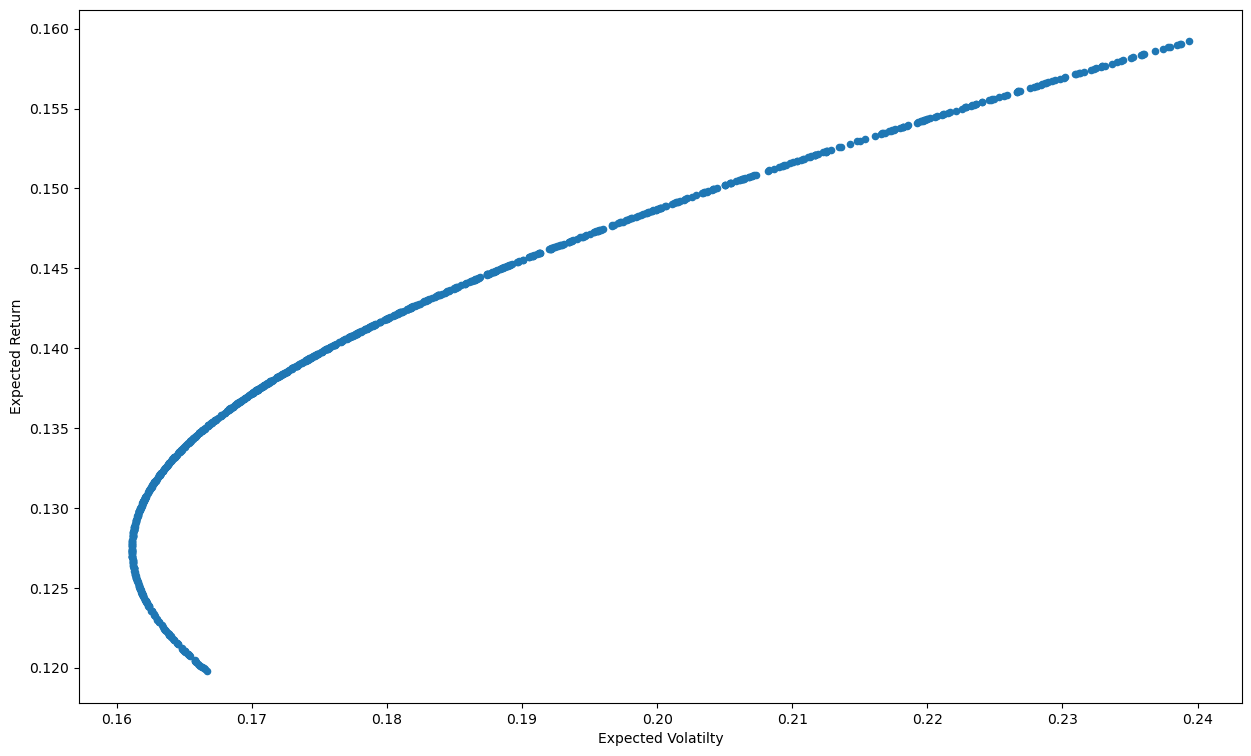

In [47]:
Portfolios.plot(x = 'Volatility', y = 'Returns', kind ='scatter', figsize = (15,9))
plt.xlabel('Expected Volatilty')
plt.ylabel('Expected Return')